# Popularity Metric Analysis for 2017-2018 Timeframe

In [1]:
import json
import pandas as pd
import numpy as np
import math
import datetime

## Reading the Data

In [2]:
restaurants_df = pd.read_csv("./../datasets/2017-2018_restaurants.csv")

In [3]:
restaurants_df.head()

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,review_count,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,49,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,24,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True
2,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",42,28,3.678571,3.5,3,2010-09-26 04:03:35,2021-01-23 01:43:50,73,True
3,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",42,38,4.631579,4.5,5,2012-08-19 21:08:57,2020-12-29 16:25:19,85,True
4,dmbbf3AqeG61_QHRZi1M1w,Pine Castle,FL,28.450303,-81.380587,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",NaN,4,3,3.000000,3.0,1,2015-06-11 16:44:12,2020-11-14 00:49:04,8,True


In [4]:
restaurants_df["raw_stars"].isna().sum()

131

In [5]:
restaurants_df = restaurants_df[restaurants_df["review_count"] > 0]

In [6]:
def get_last_date_year(row):
    date = row[15]
    last_date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return last_date.year

In [7]:
restaurants_df["last_date_year"] = restaurants_df.apply(get_last_date_year, axis=1)

In [8]:
restaurants_df["checkins_tips_count"] = restaurants_df["tip_count"] + restaurants_df["checkin_count"]

In [9]:
restaurants_df.head(2)

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,review_count,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,49,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True,2021,83
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,24,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True,2021,185


## Analyzing Data

### Looking at Restaurants

In [10]:
len(restaurants_df)

29963

In [11]:
avg_review_count = round(restaurants_df["review_count"].mean())
avg_checkins_count = round(restaurants_df["checkin_count"].mean())
avg_tips_count = round(restaurants_df["tip_count"].mean())
print(f"Restaurants have on {avg_review_count} reviews, {avg_checkins_count} checkins and {avg_tips_count} tips on average")

Restaurants have on 44 reviews, 79 checkins and 5 tips on average


In [12]:
v = len(restaurants_df[restaurants_df["checkin_count"] < 5])
print(f"There are {v} restaurants with 5 checkins or less")

There are 3365 restaurants with 5 checkins or less


In [13]:
average_star_rating = round(restaurants_df["raw_stars"].mean(), 2)
print(f"Restaurants star rating is {average_star_rating}/5 average")

Restaurants star rating is 3.53/5 average


In [14]:
restaurants_df['stars'].value_counts()

4.0    7854
3.5    6376
4.5    4960
3.0    4116
2.5    2466
2.0    1507
5.0    1343
1.5     831
1.0     510
Name: stars, dtype: int64

In [15]:
restaurants_df[['checkin_count', 'tip_count', 'review_count']].corr()

,checkin_count,tip_count,review_count
checkin_count,1.000000,0.780351,0.801923
tip_count,0.780351,1.000000,0.886868
review_count,0.801923,0.886868,1.000000


In [16]:
later_closed = restaurants_df[restaurants_df["is_open"] == 0]

print(f"There were {len(restaurants_df)} restaurants open in 2017-2018 of which {len(later_closed)} have since closed down")

There were 29963 restaurants open in 2017-2018 of which 5535 have since closed down


In [17]:
restaurants_df["visit_count"].mean()

127.66939225044221

In [18]:
restaurants_df["visit_count"].min()

1

In [19]:
restaurants_df["visit_count"].max()

6615

In [20]:
restaurants_df["visit_count"].std()

230.76558739262856

In [21]:
len(restaurants_df[restaurants_df['visit_count'] > 1000])

294

In [22]:
print("25% quantile total is " + str(restaurants_df['visit_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['visit_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['visit_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['visit_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['visit_count'].quantile(0.75)))

25% quantile total is 25.0
33% quantile total is 34.0
50% quantile total is 60.0
66% quantile total is 101.0
75% quantile total is 140.0


In [34]:
print("25% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.25)))
print("33% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.33)))
print("50% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.5)))
print("66% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.66)))
print("75% quantile total is " + str(restaurants_df['checkins_tips_count'].quantile(0.75)))

25% quantile total is 13.0
33% quantile total is 19.0
50% quantile total is 35.0
66% quantile total is 62.0
75% quantile total is 88.5


#### Correlations

In [23]:
restaurants_df[['visit_count', 'raw_stars']].corr()

,visit_count,raw_stars
visit_count,1.000000,0.186233
raw_stars,0.186233,1.000000


In [24]:
restaurants_df[['visit_count', 'is_open']].corr()

,visit_count,is_open
visit_count,1.000000,0.062643
is_open,0.062643,1.000000


In [25]:
restaurants_df[['checkins_tips_count', 'is_open']].corr()

,checkins_tips_count,is_open
checkins_tips_count,1.000000,0.062302
is_open,0.062302,1.000000


### Looking at the restaurants who later closed down

In [26]:
open_restaurants_in_2019_df = restaurants_df[restaurants_df["is_open"] == 1]

In [27]:
open_restaurants_in_2019_df["visit_count"].mean()

134.55035205501883

In [28]:
closed_restaurants_in_2019_df = restaurants_df[restaurants_df["is_open"] == 0]

In [29]:
len(closed_restaurants_in_2019_df)

5535

In [30]:
closed_restaurants_in_2019_df["visit_count"].mean()

97.30117434507679

In [31]:
# Only consider those who closed in 2019 (i.e. last activity is in 2019) because would reflect on the popularity
# of the restaurant in the previous years (2017-18)
closed_restaurants_in_2019_df = closed_restaurants_in_2019_df[closed_restaurants_in_2019_df["last_date_year"] == 2019]

In [32]:
len(closed_restaurants_in_2019_df)

1573

In [33]:
closed_restaurants_in_2019_df["visit_count"].mean()

91.41830896376351

### Looking at % of Restaurants who closed down based on visit count

In [35]:
bottom_df = restaurants_df.loc[restaurants_df["visit_count"] <= 34.0]

In [36]:
len(bottom_df)/len(restaurants_df)

0.33608116677235256

In [37]:
middle_df = restaurants_df.loc[restaurants_df["visit_count"] > 34.0]
middle_df = middle_df.loc[middle_df["visit_count"] <= 101]

In [38]:
len(middle_df)/len(restaurants_df)

0.3255014517905417

In [39]:
top_df = restaurants_df.loc[restaurants_df["visit_count"] > 101]

In [40]:
len(top_df)/len(restaurants_df)

0.33841738143710576

In [41]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [42]:
total_closed = len(closed_restaurants_in_2019_df)
print(total_closed)

1573


In [43]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [44]:
bottom_pct = round(len(bottom_closed_df) / total_closed, 2)
middle_pct = round(len(middle_closed_df) / total_closed, 2)
top_pct = round(len(top_closed_df) / total_closed, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

0.32% of closed restaurants are in the bottom 33% quartile
0.38% of closed restaurants are in the middle 33% quartile
0.29% of closed restaurants are in the top 33% quartile


In [45]:
first_df = restaurants_df.loc[restaurants_df["visit_count"] <= 60]
second_df = restaurants_df.loc[restaurants_df["visit_count"] > 60]

In [46]:
first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2019)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2019)]

In [47]:
print(f"{round(len(first_closed_df) / total_closed, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed, 2)}% of closed restaurants are in the top 50% quartile")

0.53% of closed restaurants are in the bottom 50% quartile
0.47% of closed restaurants are in the top 50% quartile


### Looking at % of Restaurants who closed down based on tips and checkins count

In [49]:
bottom_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 19.0]
middle_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 19.0]
middle_df = middle_df.loc[middle_df["checkins_tips_count"] <= 62]
top_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 62]

In [50]:
(len(bottom_df) + len(middle_df) + len(top_df))/len(restaurants_df)

1.0

In [51]:
bottom_closed_df = bottom_df[(bottom_df["is_open"] == 0) & (bottom_df["last_date_year"] == 2019)]
middle_closed_df = middle_df[(middle_df["is_open"] == 0) & (middle_df["last_date_year"] == 2019)]
top_closed_df = top_df[(top_df["is_open"] == 0) & (top_df["last_date_year"] == 2019)]

In [52]:
bottom_pct = round(len(bottom_closed_df) / total_closed, 2)
middle_pct = round(len(middle_closed_df) / total_closed, 2)
top_pct = round(len(top_closed_df) / total_closed, 2)

print(f"{bottom_pct}% of closed restaurants are in the bottom 33% quartile")
print(f"{middle_pct}% of closed restaurants are in the middle 33% quartile")
print(f"{top_pct}% of closed restaurants are in the top 33% quartile")

0.36% of closed restaurants are in the bottom 33% quartile
0.37% of closed restaurants are in the middle 33% quartile
0.28% of closed restaurants are in the top 33% quartile


In [53]:
first_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] <= 35]
second_df = restaurants_df.loc[restaurants_df["checkins_tips_count"] > 35]

first_closed_df = first_df[(first_df["is_open"] == 0) & (first_df["last_date_year"] == 2019)]
second_closed_df = second_df[(second_df["is_open"] == 0) & (second_df["last_date_year"] == 2019)]

In [54]:
print(f"{round(len(first_closed_df) / total_closed, 2)}% of closed restaurants are in the bottom 50% quartile")
print(f"{round(len(second_closed_df) / total_closed, 2)}% of closed restaurants are in the top 50% quartile")

0.55% of closed restaurants are in the bottom 50% quartile
0.45% of closed restaurants are in the top 50% quartile


### Looking at star rating of unpopular businesses

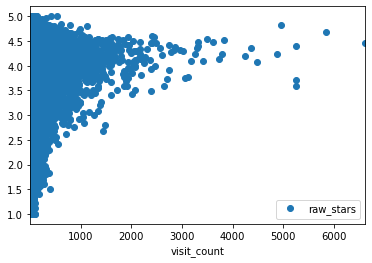

In [56]:
restaurants_df.plot(x='visit_count', y='raw_stars', style='o')

### K-Means Clustering

In [57]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [129]:
X_df = restaurants_df.copy()[["checkins_tips_count", "raw_stars"]]
X_df["raw_stars"] = X_df["raw_stars"].apply(lambda x: x*500)

In [130]:
X = X_df.to_numpy()

In [131]:
X

array([[  83.        , 1857.14285714],
       [ 185.        , 1750.        ],
       [  45.        , 1839.28571429],
       ...,
       [ 134.        , 1512.04819277],
       [ 115.        , 1490.56603774],
       [  15.        , 2156.25      ]])

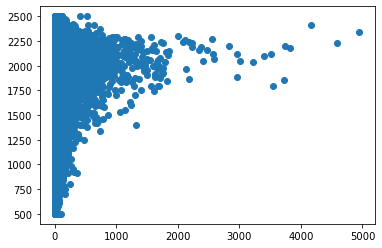

In [132]:
plt.scatter(X[:,0], X[:,1])

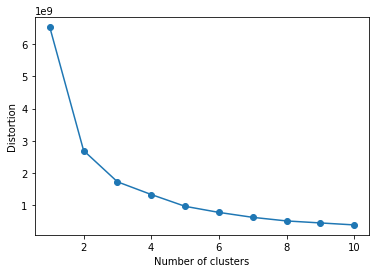

In [133]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [134]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=30, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

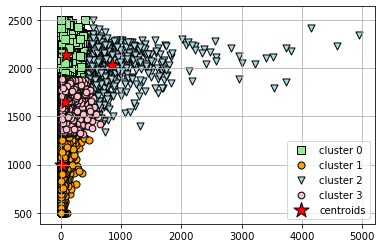

In [135]:
# plot the 4 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='pink',
    marker='8', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [136]:
y_km

array([3, 3, 3, ..., 3, 3, 0])

In [137]:
len(y_km)

29963

In [138]:
unique, counts = np.unique(list(y_km), return_counts=True)
dict(zip(unique, counts))

{0: 13007, 1: 4773, 2: 707, 3: 11476}

In [121]:
def get_label(nb):
    if nb == 0:
        return 1
    if nb == 1:
        return 2
    if nb == 2:
        return 2
    if nb == 3:
        return 0


labels = [get_label(nb) for nb in list(y_km)]

In [122]:
restaurants_df['k'] = labels

In [123]:
restaurants_df.head(10)

,business_id,city,state,latitude,longitude,is_open,attributes,categories,hours,checkin_count,...,raw_stars,stars,tip_count,first_date,last_date,visit_count,is_open_year_after,last_date_year,checkins_tips_count,k
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",79,...,3.714286,3.5,4,2017-09-09 04:42:34,2021-01-22 05:20:38,132,True,2021,83,1
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",181,...,3.500000,3.5,4,2010-03-09 16:02:04,2021-01-21 17:55:35,209,True,2021,185,1
2,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",42,...,3.678571,3.5,3,2010-09-26 04:03:35,2021-01-23 01:43:50,73,True,2021,45,1
3,ufCxltuh56FF4-ZFZ6cVhg,Orlando,FL,28.513265,-81.374707,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",42,...,4.631579,4.5,5,2012-08-19 21:08:57,2020-12-29 16:25:19,85,True,2020,47,1
4,dmbbf3AqeG61_QHRZi1M1w,Pine Castle,FL,28.450303,-81.380587,1,"{'BikeParking': 'False', 'RestaurantsPriceRang...","Automotive, American (Traditional), Gas Statio...",NaN,4,...,3.000000,3.0,1,2015-06-11 16:44:12,2020-11-14 00:49:04,8,True,2020,5,0
5,jGennaZUr2MsJyRhijNBfA,Boston,MA,42.363442,-71.025781,1,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",649,...,3.658635,3.5,15,2005-12-13 23:59:04,2020-11-04 20:09:32,913,True,2020,664,2
6,QciD6FbNklaJvUbLExD4Nw,Burnaby,BC,49.254436,-123.020050,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",41,...,4.050000,4.0,11,2016-01-17 19:58:48,2021-01-16 04:23:38,92,True,2021,52,1
7,jx91IMdGOmLOo8h_F9z39g,Portland,OR,45.526473,-122.535323,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",5,...,1.750000,2.0,1,2007-12-06 17:06:49,2020-02-22 23:57:30,10,True,2020,6,0
8,NRPemqVb4qpWFF0Avq_6OQ,Austin,TX,30.234533,-97.877262,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",214,...,4.437984,4.5,32,2017-03-17 01:53:14,2021-01-26 04:56:09,504,True,2021,246,2
9,TRToVIbaVtu1KOE8DR9gCw,Clermont,FL,28.538452,-81.737625,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Steakhouses, Restaurants, Salad, Barbeque, Ame...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",54,...,3.688889,3.5,5,2014-12-07 01:10:37,2021-01-18 16:39:13,104,True,2021,59,1


In [124]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 9102, 1: 18585, 2: 2276}

In [125]:
restaurants_df[["visit_count", "k"]].corr()

,visit_count,k
visit_count,1.00000,0.50504
k,0.50504,1.00000


### Trying to validate the cluster classification